In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# importing all the libraries
from sklearn.preprocessing import MinMaxScaler as mns
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs

from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Lasso as L
from sklearn.linear_model import ElasticNet as en

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import mean_squared_error, r2_score as r2
from sklearn import model_selection as mods
from sklearn.svm import SVR as svr
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import json as js #first imported all the necessary modules
import csv
import time
import datetime
from sklearn.preprocessing import StandardScaler as st
from sklearn.ensemble import GradientBoostingRegressor as gbr
import requests

In [3]:
dataset=pd.read_json("https://cloud.iexapis.com/stable/stock/aapl/intraday-prices/batch?token=pk_3d8b587b018743f1a1009cae155b452d ")

In [4]:
dataset

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades
0,2020-10-15,09:30,09:30 AM,119.235,118.18,118.72,119.210,118.583,97725,1.158852e+07,535
1,2020-10-15,09:31,09:31 AM,119.540,119.33,119.41,119.330,119.460,17861,2.133678e+06,112
2,2020-10-15,09:32,09:32 AM,119.710,119.25,119.36,119.710,119.368,6890,8.224427e+05,49
3,2020-10-15,09:33,09:33 AM,119.670,119.40,119.67,119.500,119.520,10909,1.303848e+06,72
4,2020-10-15,09:34,09:34 AM,119.540,119.16,119.45,119.280,119.334,16279,1.942644e+06,95
...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-15,15:55,3:55 PM,120.845,120.75,120.77,120.770,120.796,14233,1.719296e+06,73
386,2020-10-15,15:56,3:56 PM,120.830,120.72,120.75,120.800,120.772,10807,1.305185e+06,49
387,2020-10-15,15:57,3:57 PM,120.830,120.67,120.81,120.695,120.737,14183,1.712417e+06,90
388,2020-10-15,15:58,3:58 PM,120.690,120.58,120.69,120.670,120.642,24161,2.914823e+06,126


In [6]:
from pandas import DataFrame as df

data=df(dataset)
dataframe=df(data)
times = dataframe['date']
timestamp=[]
for i in times:
  timestamp.append(1602201600)

In [8]:
mint=dataframe['minute']
mint=np.array(mint)

In [9]:
hour=[] 
mins=[] 

for i in mint:
    h,m = i.split(':')
    hour.append(int(h))
    mins.append(int(m))

In [10]:
hour=np.array(hour)
mins=np.array(mins)
hour=hour*60
t=hour+mins

In [11]:
#adding the minutes to the dates
timestamp=np.array(timestamp)
fin=t+timestamp
dataframe['timestamp']= fin
dataframe

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades,timestamp
0,2020-10-15,09:30,09:30 AM,119.235,118.18,118.72,119.210,118.583,97725,1.158852e+07,535,1602202170
1,2020-10-15,09:31,09:31 AM,119.540,119.33,119.41,119.330,119.460,17861,2.133678e+06,112,1602202171
2,2020-10-15,09:32,09:32 AM,119.710,119.25,119.36,119.710,119.368,6890,8.224427e+05,49,1602202172
3,2020-10-15,09:33,09:33 AM,119.670,119.40,119.67,119.500,119.520,10909,1.303848e+06,72,1602202173
4,2020-10-15,09:34,09:34 AM,119.540,119.16,119.45,119.280,119.334,16279,1.942644e+06,95,1602202174
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-15,15:55,3:55 PM,120.845,120.75,120.77,120.770,120.796,14233,1.719296e+06,73,1602202555
386,2020-10-15,15:56,3:56 PM,120.830,120.72,120.75,120.800,120.772,10807,1.305185e+06,49,1602202556
387,2020-10-15,15:57,3:57 PM,120.830,120.67,120.81,120.695,120.737,14183,1.712417e+06,90,1602202557
388,2020-10-15,15:58,3:58 PM,120.690,120.58,120.69,120.670,120.642,24161,2.914823e+06,126,1602202558


In [12]:
#creating dataframe
datas= df(dataframe[['timestamp', 'open']])
datas

,timestamp,open
0,1602202170,118.72
1,1602202171,119.41
2,1602202172,119.36
3,1602202173,119.67
4,1602202174,119.45
...,...,...
385,1602202555,120.77
386,1602202556,120.75
387,1602202557,120.81
388,1602202558,120.69


In [13]:
array=datas.values
X=array[:,0]
Y=array[:,1]

In [14]:
#validation
rx=array[:, 0].reshape(-1,1)

#print(rx)

val_size = 0.33
seed = 3
x_train, x_val, y_train, y_val = tts(rx, Y, test_size=val_size, random_state=seed)

In [15]:
num_folds=3
seed =1
scoring='r2'

In [16]:
models=[('LR', lr()), ('Lasso', L()), ('ElasticNet', en()), ('KNN', knn()), ('CART', dtr()), ("SVR", svr())]
result=[]
names=[]

for name, model in models:
    kfold= kf(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_res=cvs(model, x_train, y_train, cv=kfold, scoring = scoring)
    result.append(cv_res)
    names.append(name)
    
    msg= "%s : %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print (msg)

LR : 0.553922 (0.042522)
Lasso : 0.553686 (0.042339)
ElasticNet : 0.553896 (0.042436)
KNN : 0.923839 (0.026812)
CART : 0.651766 (0.010414)
SVR : -2.518200 (0.545466)


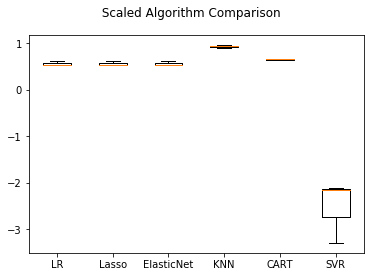

In [18]:
fig = plt.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

plt.rcParams['figure.figsize']=(30,20)

#algorithm comparison

In [19]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=20,random_state=5)
model.fit(x_train, y_train)
predictions=model.predict(x_val)

print(r2(y_val,predictions))

0.642257643826276


In [20]:
scaler = st().fit(x_train)
rescaledx = scaler.transform(x_train)
model = gbr(random_state=seed, n_estimators=100)
model.fit(rescaledx, y_train)

rescaledValidationx = scaler.transform(x_val)
predictions = model.predict(rescaledValidationx)
print(r2(y_val, predictions))

0.958445863843167


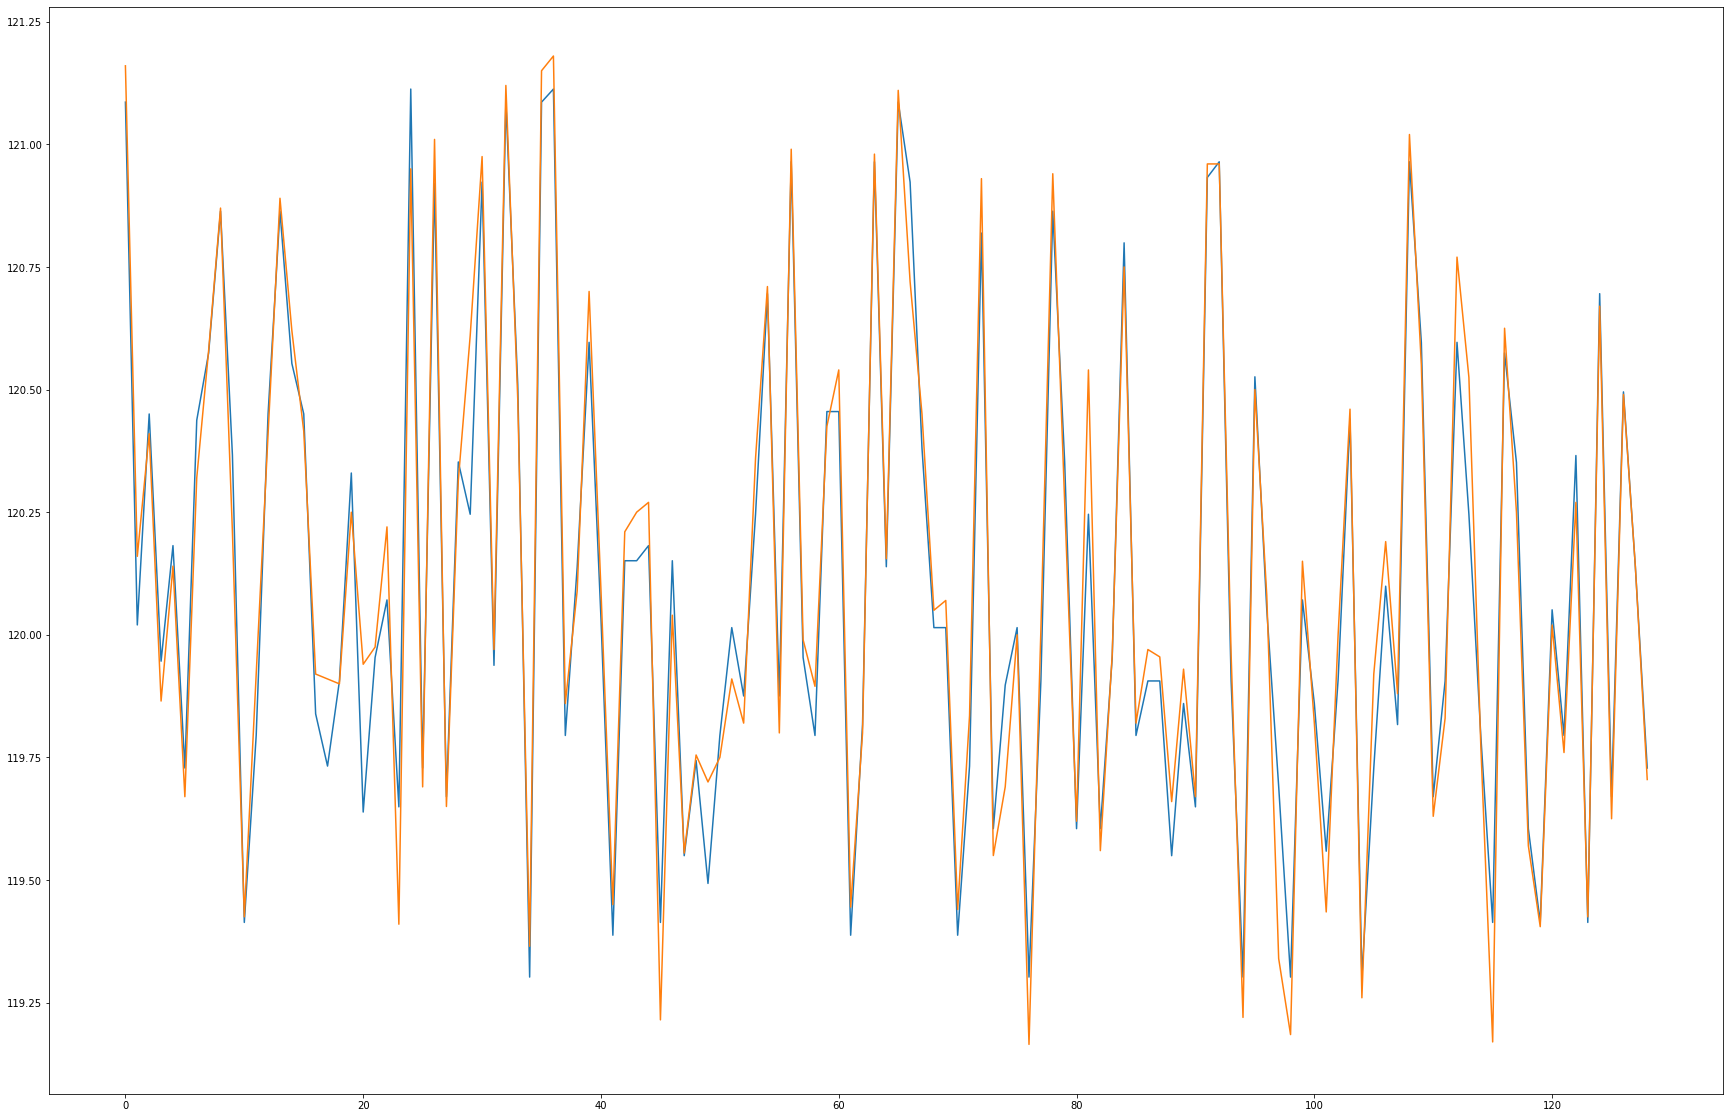

In [21]:
plt.plot(predictions)
plt.plot(y_val)

plt.rcParams['figure.figsize']=(50,25)
plt.show()

# orange- original
# blue- prediction